# Markov Chain Monte Carlo (MCMC)

In [1]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 16}) 
import scipy.stats as stats
import savingfigR as sf

## Monte Carlo

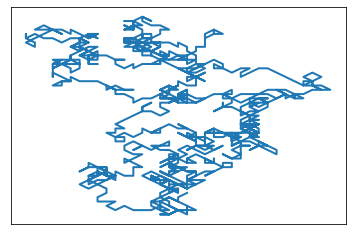

In [2]:
walk = np.empty([1000, 2])
walk[0,:] = [-2,-2]
for i in range(1, 1000):
    directionX = np.random.choice((-1, 0, 1), 1)
    walk[i,0] = walk[i-1,0] + directionX
    directionY = np.random.choice((-1, 0, 1), 1)
    walk[i,1] = walk[i-1,1] + directionY

fig = plt.figure()
plt.plot(walk[:,0], walk[:,1], lw=2)
plt.xticks([])
plt.yticks([])
plt.show()

sf.best_save(fig, 'rndwalk')

## Gibbs Sampling - Binomial Distribution 

In [3]:
K = 16
N = 20
n = 10000 # number of samples to perform
alpha = 1
beta = 1
WEIGHT = np.empty(n)
WEIGHT[1] = 0.5
burn = 1000 # burn in period
for i in range(1, n):
    WEIGHT[i] = np.random.beta((K+alpha), (N-K+beta), 1)

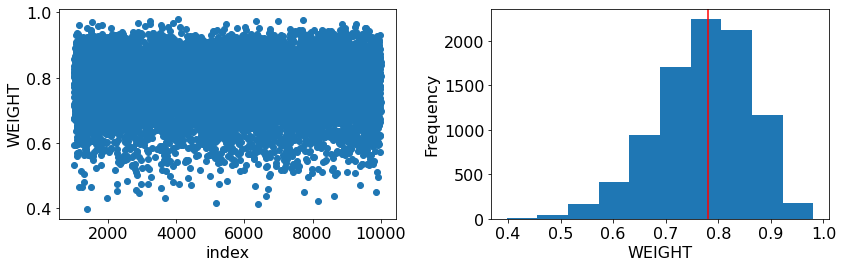

In [4]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(np.arange(burn, n), WEIGHT[burn:])
plt.xlabel('index')
plt.ylabel('WEIGHT')
plt.subplot(1,2,2)
plt.hist(WEIGHT[burn:])
plt.axvline(np.median(WEIGHT[burn:]), c='r')
plt.xlabel('WEIGHT')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

sf.best_save(fig, 'gibbsBinom')

## Gibbs Sampling - Normal Distribution 

In [5]:
x = np.array([105.01510, 97.05776, 106.70943, 98.73814, 95.81697, 92.36068, 76.02600, 112.06383, 109.26824, 108.18182])
n = 100000 # number of samples to perform
MU = np.empty(n) # initialize arrays
SIGMA = np.empty(n)
MU[0] = 90 # initial guess
SIGMA[0] = 5

for i in range(1, n):
    SIGMA[i] = np.sqrt(1/np.random.gamma(len(x)/2,1/np.sum((x-MU[i-1])**2)/2)) # 1 divide to make same as rgamma in R (rate argument v scale argument )
    MU[i] = np.random.normal(np.mean(x),SIGMA[i]/len(x))

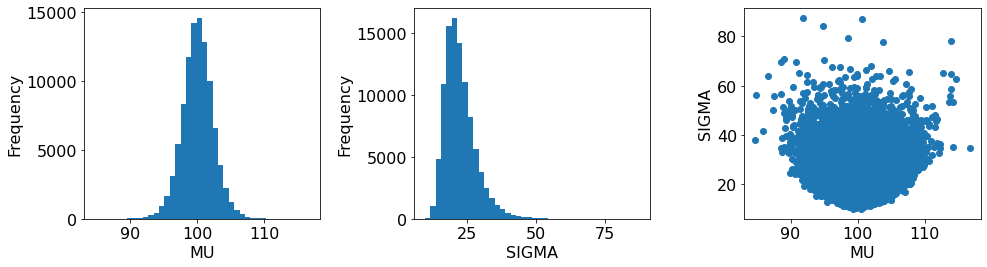

In [6]:
fig = plt.figure(figsize=(14,4)) 
plt.subplot(1,3,1)
plt.hist(MU[burn:], bins=40)
plt.xlabel('MU')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
plt.hist(SIGMA[burn:], bins=40)
plt.xlabel('SIGMA')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
plt.scatter(MU[burn:], SIGMA[burn:])
plt.xlabel('MU')
plt.ylabel('SIGMA')

plt.tight_layout()
plt.show()

sf.best_save(fig, 'gibbsNormal')

In [7]:
MUmode = stats.mode(MU[burn:])
print(MUmode)
SIGmode = stats.mode(SIGMA[burn:])
print(SIGmode)

ModeResult(mode=array([84.71015212]), count=array([1]))
ModeResult(mode=array([9.73416945]), count=array([1]))


## Gibbs Sampling - Plots

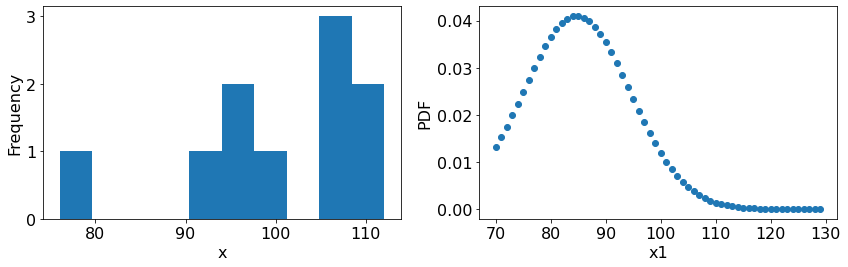

In [8]:
x1 = np.arange(70, 130, 1)
pdfx = (1 / (SIGmode[0] * np.sqrt(2 * np.pi)))*np.exp(-(1/2) * ((x1 - MUmode[0])/SIGmode[0])**2)

fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(x, 10)
plt.xlabel('x')
plt.ylabel('Frequency')
plt.subplot(1,2,2)
plt.scatter(x1, pdfx)
plt.xlabel('x1')
plt.ylabel('PDF')

plt.tight_layout()
plt.show()

sf.best_save(fig, 'gibbssamp_plots')

## Metropolis-Hastings - Example 

In [9]:
def log_q(w, k=16, n=20, alpha=1, beta=1):
    if (w<0 or w>1):
        return (-np.inf)
    lq = (k+alpha-1)*np.log(w)+(n-k+beta-1)*np.log(1-w)
    return lq

In [10]:
n = 100000
current = 0.5 # Initial guess of w
samps = np.empty(n)
for i in range(1, n): 
    proposed = np.random.normal(current, 0.4) # tuning parameter is 0.4
    logr = log_q(proposed)-log_q(current)
    if (np.log(np.random.uniform(low=0, high=1)) <= logr):
        current = proposed
    samps[i] = current

acc_rate = len(np.unique(samps))/n # acceptance rate
print(acc_rate)

0.25833


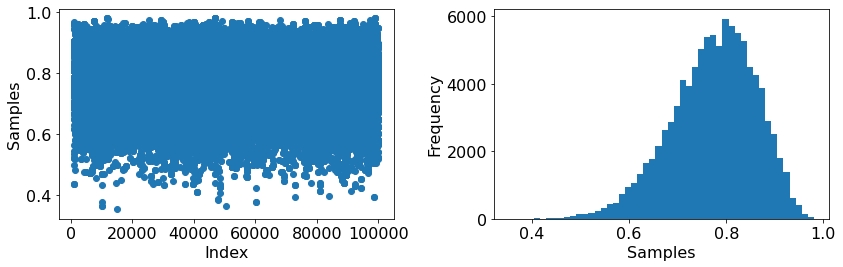

In [11]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(np.arange(burn, n), samps[burn:])
plt.xlabel('Index')
plt.ylabel('Samples')
plt.subplot(1,2,2)
plt.hist(samps[burn:], 50)
plt.xlabel('Samples')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

sf.best_save(fig, 'MH')

In [12]:
stats.mode(samps[burn:])

ModeResult(mode=array([0.80167655]), count=array([40]))

## PyMC3 (JAGS equivalent)

In [13]:
# look up if interested 